## BD5write_numpy

* BD5write_numpy is a sample code to demonstrate how to create BD5 files for line, face, sphere, point, and circle objects.

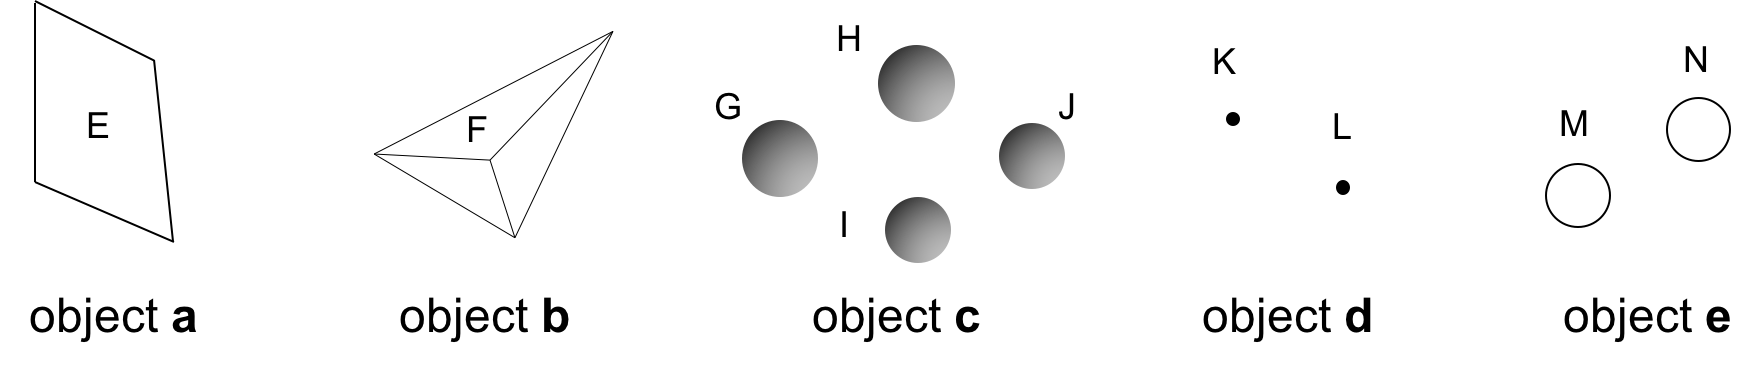

In [1]:
# Displaying a png image
from IPython.display import Image
Image(filename="BD5numpy_examples.png")

This sample code requires the user to install several packages. They are:

- h5py - https://www.h5py.org/
- Numpy - https://numpy.org/
- plotly - https://plotly.com/python/

In [2]:
# Please consult the official websites for installation for your particular Operating system and environment.
# The following commands installed the necessary packages for juypter notebook in a Ubuntu docker container as a sample for your reference.

# Uncomment the # tag if you want the commands below to install those packages.

#!pip install h5py
#!pip install plotly

In [3]:
# Author: Ken Ho
# Date: 6 July 2020
# sample code for writing BD5 files for line and face objects

#import sys
#import argparse
import h5py
import numpy as np

In [4]:
# Creating a new BD5 file to write to
bd5f = h5py.File("sample_line_numpy_bd5.h5", "w")

### Creating a hdf5 datagroup "data"

In [5]:
data = bd5f.create_group('/data')

### Creating a hdf5 dataset "scaleUnit" under datagroup "data"

* First setting up the numpy array scaleunit
* Create the hdf5 dataset using the numpy array scaleunit

### Setting up the scaleUnit type

In [6]:
# setting up datatype for scaleUnit
su_type = np.dtype({'names': ['dimension','xScale','yScale','zScale', 'sUnit'],
               'formats': ['S8', 'f8', 'f8', 'f8', 'S16']})

In [7]:
# setting up a numpy array scaleunit
# User needs to provide the data dimension, xScale, yScale, zScale and sUnit

# This is a more compact form of the above without using an object
scaleunit = np.array([('3D', 1.0, 1.0,  1.0, 'micrometer')], dtype=su_type)

### Creating the scaleUnit dataset under /data in BD5 with numpy array scaleunit

In [8]:
bd5scaleunit = bd5f.create_dataset('/data/scaleUnit', data=scaleunit)

### Similary we create a hdf5 dataset "objectDef" under datagroup "data"

In [9]:
# setting up datatype for scaleUnit
objdf_type = np.dtype({'names': ['oID','name'],
               'formats': ['i4', 'S128']})

In [10]:
objectdef = np.array([(0, 'a')], dtype=objdf_type)

In [11]:
bd5objdef = bd5f.create_dataset('/data/objectDef', data=objectdef)

### Creating the "object" hdf5 datagroup under datagroup "/data/0"

In [12]:
object0 = bd5f.create_group('/data/0/object')

### Creating the objarr numpy array to store the line object information

In [13]:
# Setting up a numpy array with the correct data type for storing line data
obj_type = np.dtype({'names': ['ID','t','entity', 'sID','x', 'y', 'z', 'label'],
               'formats': ['S10', 'f8', 'S6', 'int','f8', 'f8', 'f8', 'S20']})

In [14]:
objarr = np.array([[('000001', 0.0, 'line', 0, 2.0, 1.0, 0.0, 'E')],
                   [('000001', 0.0, 'line', 0, 2.0, 10.0, 0.0, 'E')],
                   [('000001', 0.0, 'line', 0, 9.0, 13.0, 0.0, 'E')],
                   [('000001', 0.0, 'line', 0, 8.0, 4.0, 0.0, 'E')],
                   [('000001', 0.0, 'line', 0, 2.0, 1.0, 0.0, 'E')]], dtype=obj_type)


In [15]:
objarr

array([[(b'000001', 0., b'line', 0, 2.,  1., 0., b'E')],
       [(b'000001', 0., b'line', 0, 2., 10., 0., b'E')],
       [(b'000001', 0., b'line', 0, 9., 13., 0., b'E')],
       [(b'000001', 0., b'line', 0, 8.,  4., 0., b'E')],
       [(b'000001', 0., b'line', 0, 2.,  1., 0., b'E')]],
      dtype=[('ID', 'S10'), ('t', '<f8'), ('entity', 'S6'), ('sID', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('label', 'S20')])

### Creating the "0" dataset under hdf5 datagroup "/data/0/object" using np.array 

In [16]:
object00 = bd5f.create_dataset('/data/0/object/0', data=objarr)

### Closing the BD5 file

In [17]:
bd5f.close()

## Reading back the BD5 file

In [18]:
bd5f1 = h5py.File("sample_line_numpy_bd5.h5", "r")

In [19]:
scaleunit = bd5f1['/data/scaleUnit']

In [20]:
object00 = bd5f1['/data/0/object/0']
object00[:]

array([[(b'000001', 0., b'line', 0, 2.,  1., 0., b'E')],
       [(b'000001', 0., b'line', 0, 2., 10., 0., b'E')],
       [(b'000001', 0., b'line', 0, 9., 13., 0., b'E')],
       [(b'000001', 0., b'line', 0, 8.,  4., 0., b'E')],
       [(b'000001', 0., b'line', 0, 2.,  1., 0., b'E')]],
      dtype=[('ID', 'S10'), ('t', '<f8'), ('entity', 'S6'), ('sID', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('label', 'S20')])

### Ploting the line object in 3D

In [21]:
from mpl_toolkits import mplot3d

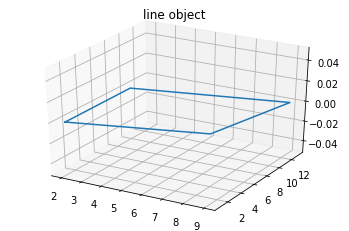

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X= np.hstack(object00['x'])*scaleunit['xScale'][0]
Y= np.hstack(object00['y'])*scaleunit['yScale'][0]
Z= np.hstack(object00['z'])*scaleunit['zScale'][0]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(X, Y, Z)
# ax.plot_trisurf(X, Y, Z, edgecolor='Blue');
ax.set_title('line object');

In [23]:
bd5f1.close()

## Creating a BD5 file for a 3D object with 4 faces

In [24]:
### Creating a new BD5 file to write to
bd5f = h5py.File("sample_face_numpy_bd5.h5", "w")

# setting up datatype for scaleUnit
su_type = np.dtype({'names': ['dimension','xScale','yScale','zScale', 'sUnit'],
               'formats': ['S8', 'f8', 'f8', 'f8', 'S16']})

# setting up a numpy array scaleunit
# User needs to provide the data dimension, xScale, yScale, zScale and sUnit
scaleunit = np.array([('3D', 1.0, 1.0,  1.0, 'micrometer')], dtype=su_type)

bd5scaleunit = bd5f.create_dataset('/data/scaleUnit', data=scaleunit)

# setting up datatype for scaleUnit
objdf_type = np.dtype({'names': ['oID','name'],
               'formats': ['i4', 'S128']})

objectdef = np.array([(0, 'b')], dtype=objdf_type)

bd5objdef = bd5f.create_dataset('/data/objectDef', data=objectdef)

object0 = bd5f.create_group('/data/0/object')



In [25]:
# Setting up a numpy array with the correct data type for storing face data
obj_type = np.dtype({'names': ['ID','t','entity', 'sID','x', 'y', 'z', 'label'],
               'formats': ['S10', 'f8', 'S6', 'int','f8', 'f8', 'f8', 'S20']})

objarr = np.array([[('000100', 0.0, 'face', 0, 1.0, 1.0, 1.0, 'F')],
                   [('000100', 0.0, 'face', 0, 2.0, 3.0, 0.0, 'F')],
                   [('000100', 0.0, 'face', 0, 3.0, 1.0, 2.0, 'F')],
                   [('000100', 0.0, 'face', 1, 1.0, 1.0, 1.0, 'F')],
                   [('000100', 0.0, 'face', 1, 3.0, 1.0, 2.0, 'F')], 
                   [('000100', 0.0, 'face', 1, 4.0, 5.0, 4.0, 'F')],
                   [('000100', 0.0, 'face', 2, 4.0, 5.0, 4.0, 'F')],
                   [('000100', 0.0, 'face', 2, 3.0, 1.0, 2.0, 'F')], 
                   [('000100', 0.0, 'face', 2, 2.0, 3.0, 0.0, 'F')],
                   [('000100', 0.0, 'face', 3, 1.0, 1.0, 1.0, 'F')],
                   [('000100', 0.0, 'face', 3, 4.0, 5.0, 4.0, 'F')], 
                   [('000100', 0.0, 'face', 3, 2.0, 3.0, 0.0, 'F')]],
                  dtype=obj_type)

In [26]:
object00 = bd5f.create_dataset('/data/0/object/0', data=objarr)

bd5f.close()

## Reading back the BD5 file containing 3D object with 4 faces

In [27]:
bd5f1 = h5py.File("sample_face_numpy_bd5.h5", "r")

scaleunit = bd5f1['/data/scaleUnit']

object00 = bd5f1['/data/0/object/0']
object00[:]

array([[(b'000100', 0., b'face', 0, 1., 1., 1., b'F')],
       [(b'000100', 0., b'face', 0, 2., 3., 0., b'F')],
       [(b'000100', 0., b'face', 0, 3., 1., 2., b'F')],
       [(b'000100', 0., b'face', 1, 1., 1., 1., b'F')],
       [(b'000100', 0., b'face', 1, 3., 1., 2., b'F')],
       [(b'000100', 0., b'face', 1, 4., 5., 4., b'F')],
       [(b'000100', 0., b'face', 2, 4., 5., 4., b'F')],
       [(b'000100', 0., b'face', 2, 3., 1., 2., b'F')],
       [(b'000100', 0., b'face', 2, 2., 3., 0., b'F')],
       [(b'000100', 0., b'face', 3, 1., 1., 1., b'F')],
       [(b'000100', 0., b'face', 3, 4., 5., 4., b'F')],
       [(b'000100', 0., b'face', 3, 2., 3., 0., b'F')]],
      dtype=[('ID', 'S10'), ('t', '<f8'), ('entity', 'S6'), ('sID', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('label', 'S20')])

### Ploting the 3D object with lines

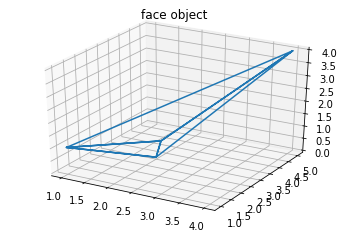

In [28]:

X= np.hstack(object00['x'])*scaleunit['xScale'][0]
Y= np.hstack(object00['y'])*scaleunit['yScale'][0]
Z= np.hstack(object00['z'])*scaleunit['zScale'][0]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(X, Y, Z)
#ax.plot_trisurf(X, Y, Z, edgecolor='Blue');
ax.set_title('face object');

### Re-arrange the 3D object data into a list of triangles for displaying as 3D polygons.
* Triangle is represented by a list of x, y, z coordinates

In [29]:
# Re-arrange the 3D object data into a list of triangles for displaying as 3D polygons.
# Triangle is represented by a list of x, y, z coordinates
poly3d = []
for j in range(0,4):
    poly3d1 = []
    for i in object00[object00['sID'] == j]:
        poly3d1.append([i['x'], i['y'], i['z']])
    poly3d.append(poly3d1)
# uncomment the line below to print out the data structure for plotting out as 3D polygon
#print(poly3d)

(0.0, 5.0)

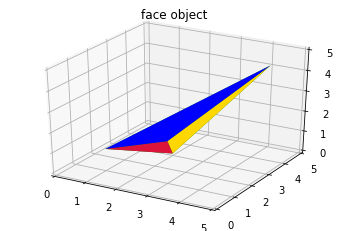

In [30]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# display the 3D plot as static
%matplotlib inline

fig = plt.figure()
ax = plt.axes(projection='3d')
fc = ["crimson", "blue", "gold", "green"]

ax.add_collection3d(Poly3DCollection(poly3d, facecolors=fc, linewidths=1))
ax.set_title('face object');
ax.set_xlim(0,5)
ax.set_ylim(0,5)
ax.set_zlim(0,5)

In [32]:
bd5f1.close()

In [33]:
# Author: Koji Kyoda
# sample code for writing BD5 files for sphere, circle and point objects


## Creating a BD5 file for sphere objects

In [46]:
import h5py
import numpy as np

bd5f = h5py.File("sample_sphere_numpy_bd5.h5", "w")
data = bd5f.create_group('/data')

# setting up datatype for scaleUnit
su_type = np.dtype({'names': ['dimension','xScale','yScale','zScale', 'sUnit'],
               'formats': ['S8', 'f8', 'f8', 'f8', 'S16']})

# setting up a numpy array scaleunit
# User needs to provide the data dimension, xScale, yScale, zScale and sUnit
scaleunit = np.array([('3D', 0.09, 0.09, 1.0, 'micrometer')], dtype=su_type)

bd5scaleunit = bd5f.create_dataset('/data/scaleUnit', data=scaleunit)

# setting up datatype for scaleUnit
objdf_type = np.dtype({'names': ['oID','name'],
               'formats': ['i4', 'S128']})

objectdef = np.array([(0, 'c')], dtype=objdf_type)

bd5objdef = bd5f.create_dataset('/data/objectDef', data=objectdef)

object0 = bd5f.create_group('/data/0/object')

obj_type = np.dtype({'names': ['ID','t','entity', 'x', 'y', 'z', 'radius', 'label'],
               'formats': ['S10', 'f8', 'S8', 'f8', 'f8', 'f8', 'f8', 'S16']})

objarr = np.array([[('000001', 0.0, 'sphere', 189.0, 251.0, 17.2, 3.96, 'G')],
                   [('000002', 0.0, 'sphere', 387.0, 153.0, 16.6, 3.87, 'H')],
                   [('000003', 0.0, 'sphere', 380.0, 366.0, 16.1, 3.6, 'I')],
                   [('000004', 0.0, 'sphere', 562.0, 269.0, 18.1, 3.6, 'J')]],
                  dtype=obj_type)

object00 = bd5f.create_dataset('/data/0/object/0', data=objarr)
bd5f.close()

OSError: Unable to create file (unable to truncate a file which is already open)

In [48]:
bd5file1.close()

NameError: name 'bd5file1' is not defined

### Reading back the BD5 file containing spheres

In [44]:
bd5f1 = h5py.File("sample_sphere_numpy_bd5.h5", "r")

scaleunit = bd5f1['/data/scaleUnit']

object0 = bd5f1['/data/0/object/0']

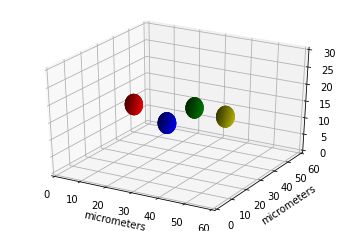

In [45]:
import matplotlib.pyplot as plt
# display the 3D plot as static
%matplotlib inline

# Create a sphere
def sphere(r):
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
    x1 = r*sin(phi)*cos(theta)
    y1 = r*sin(phi)*sin(theta)
    z1 = r*cos(phi)
    u = np.linspace(0, np.pi, 30)
    v = np.linspace(0, 2*np.pi, 30)
    return x1, y1, z1

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim([0,60])
ax.set_ylim([0,60])
ax.set_zlim([0,30])
plt.xlabel('micrometers')
plt.ylabel('micrometers')

j=0 # colour index
colour = ['r', 'b', 'g', 'y']
for i in object0:
    radius = int(i['radius'])
    xx, yy, zz = sphere(radius)
    sph_obj = ax.plot_surface(xx+(i['x'] * scaleunit[0]['xScale']), yy+(i['y'] * scaleunit[0]['yScale']), zz+(i['z'] * scaleunit[0]['zScale']), color=colour[j])
    ax.add_artist(sph_obj)
    j=j+1 # change colour
plt.show()

## Creating a BD5 file for point objects

In [37]:
import h5py
import numpy as np

bd5f = h5py.File("sample_point_numpy_bd5.h5", "w")
data = bd5f.create_group('/data')

# setting up datatype for scaleUnit
su_type = np.dtype({'names': ['dimension','xScale','yScale','zScale', 'sUnit'],
               'formats': ['S8', 'f8', 'f8', 'f8', 'S16']})

# setting up a numpy array scaleunit
# User needs to provide the data dimension, xScale, yScale, zScale and sUnit
scaleunit = np.array([('3D', 0.09, 0.09, 1.0, 'micrometer')], dtype=su_type)

bd5scaleunit = bd5f.create_dataset('/data/scaleUnit', data=scaleunit)

# setting up datatype for scaleUnit
objdf_type = np.dtype({'names': ['oID','name'],
               'formats': ['i4', 'S128']})

objectdef = np.array([(0, 'd')], dtype=objdf_type)

bd5objdef = bd5f.create_dataset('/data/objectDef', data=objectdef)

object0 = bd5f.create_group('/data/0/object')

obj_type = np.dtype({'names': ['ID','t','entity', 'x', 'y', 'z', 'label'],
               'formats': ['S10', 'f8', 'S8', 'f8', 'f8', 'f8', 'S16']})

objarr = np.array([[('000001', 0.0, 'point', 189.0, 251.0, 17.2, 'K')],
                   [('000002', 0.0, 'point', 380.0, 366.0, 16.1, 'L')]],
                  dtype=obj_type)

object00 = bd5f.create_dataset('/data/0/object/0', data=objarr)
bd5f.close()

### Reading back the BD5 file containing point

In [38]:
bd5f1 = h5py.File("sample_point_numpy_bd5.h5", "r")

scaleunit = bd5f1['/data/scaleUnit']

object0 = bd5f1['/data/0/object/0']

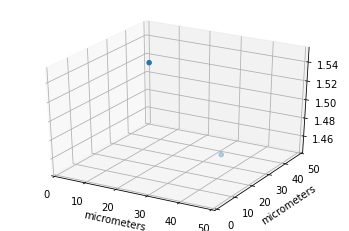

In [39]:
import matplotlib.pyplot as plt

# display the 3D plot as static
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')  # subplot of 1x1 grid plot no. 1
# change default range so that new circles will display in micrometers

xscale = scaleunit[0]['xScale']
yscale = scaleunit[0]['yScale']
zscale = scaleunit[0]['yScale']

ax = plt.axes(projection="3d")

ax.set_xlim((0, 50))
ax.set_ylim((0, 50))

plt.xlabel('micrometers')
plt.ylabel('micrometers')
ax.scatter3D(object0['x']*xscale, object0['y']*yscale, object0['z']*zscale, cmap='hsv');

plt.show()

# closing the BD5 file
bd5f1.close()

## Creating a BD5 file for circle objects

In [40]:
import h5py
import numpy as np

bd5f = h5py.File("sample_circle_numpy_bd5.h5", "w")
data = bd5f.create_group('/data')

# setting up datatype for scaleUnit
su_type = np.dtype({'names': ['dimension','xScale','yScale', 'sUnit'],
               'formats': ['S8', 'f8', 'f8', 'S16']})

# setting up a numpy array scaleunit
# User needs to provide the data dimension, xScale, yScale, zScale and sUnit
scaleunit = np.array([('2D', 0.09, 0.09, 'micrometer')], dtype=su_type)

bd5scaleunit = bd5f.create_dataset('/data/scaleUnit', data=scaleunit)

# setting up datatype for scaleUnit
objdf_type = np.dtype({'names': ['oID','name'],
               'formats': ['i4', 'S128']})

objectdef = np.array([(0, 'e')], dtype=objdf_type)

bd5objdef = bd5f.create_dataset('/data/objectDef', data=objectdef)

object0 = bd5f.create_group('/data/0/object')

obj_type = np.dtype({'names': ['ID','t','entity', 'x', 'y', 'radius', 'label'],
               'formats': ['S10', 'f8', 'S8', 'f8', 'f8', 'f8', 'S16']})

objarr = np.array([[('000003', 0.0, 'circle', 380.0, 366.0, 3.6, 'M')],
                   [('000004', 0.0, 'circle', 562.0, 269.0, 3.6, 'N')]],
                  dtype=obj_type)

object00 = bd5f.create_dataset('/data/0/object/0', data=objarr)
#closing BD5 file
bd5f.close()

### Reading back the BD5 file containing circles

In [41]:
bd5f1 = h5py.File("sample_circle_numpy_bd5.h5", "r")

scaleunit = bd5f1['/data/scaleUnit']

object0 = bd5f1['/data/0/object/0']

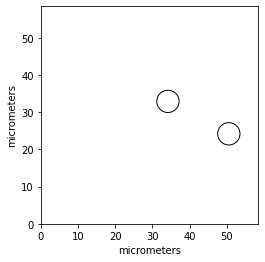

In [42]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
# display the 3D plot as static
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')  # subplot of 1x1 grid plot no. 1
# change default range so that new circles will display in micrometers
h=650
w=650
xscale = h * scaleunit[0]['xScale']
yscale = w * scaleunit[0]['yScale']
ax.set_xlim((0, xscale))
ax.set_ylim((0, yscale))
plt.xlabel('micrometers')
plt.ylabel('micrometers')

# draw the circles
for i in object0:
    centre = (i['x'] * scaleunit[0]['xScale'], i['y'] * scaleunit[0]['yScale'])
    radius = int(i['radius'])
    circle=plt.Circle(centre, radius, fill=False)
    ax.add_artist(circle)
plt.show()

# close the BD5 file
bd5f1.close()